In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


%matplotlib inline

### Read data

In [2]:
df = pd.read_csv("/Users/AnhHuynh/Documents/FALL 2023/INTERMEDIATE PYTHON/INSTAGRAM project/Instagram data.csv",encoding='latin1')
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

### Data cleansing 

In [3]:
# Check for null values

df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [25]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### Exploratory Data Analysis

<AxesSubplot:title={'center':'Distribution of impressions from home'}, xlabel='From Home', ylabel='Count'>

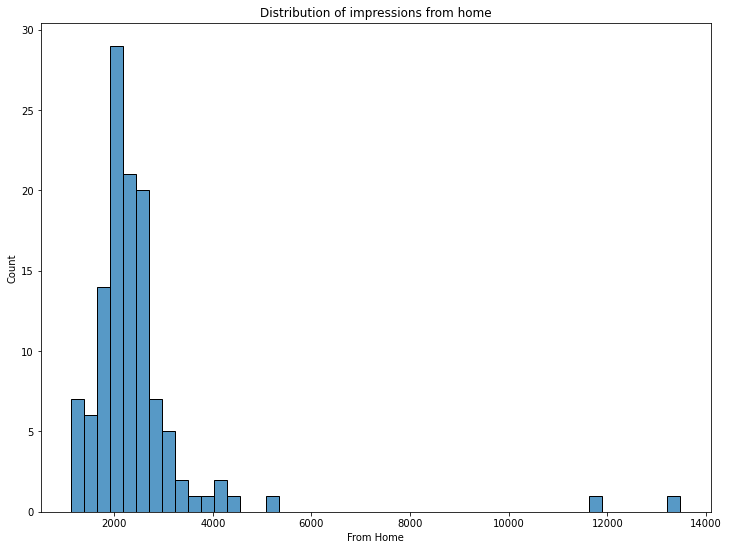

In [6]:
# Distribution of Impresssions from home

plt.figure(figsize=(12,9))
plt.title("Distribution of impressions from home")
sns.histplot(df['From Home'])

<AxesSubplot:title={'center':'Distribution of impressions from hashtags'}, xlabel='From Hashtags', ylabel='Count'>

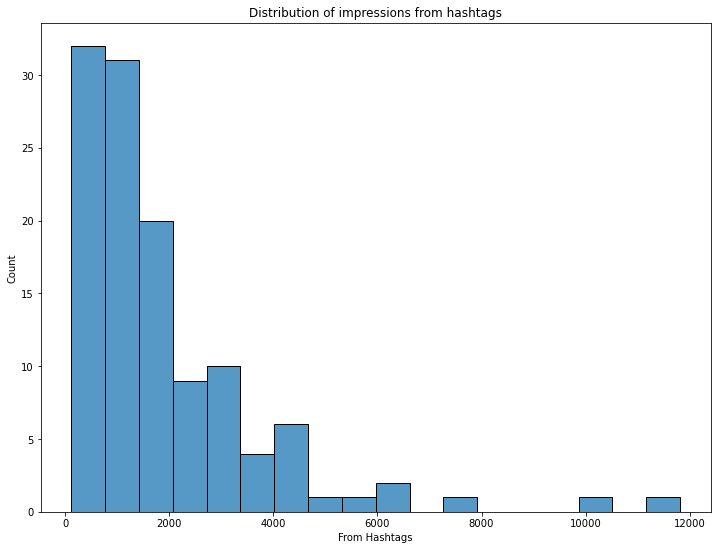

In [7]:
# Distribution of impressions from Hashtags
plt.figure(figsize=(12,9))
plt.title("Distribution of impressions from hashtags")
sns.histplot(df['From Hashtags'])


<AxesSubplot:title={'center':'Distribution of impressions from explore'}, xlabel='From Explore', ylabel='Count'>

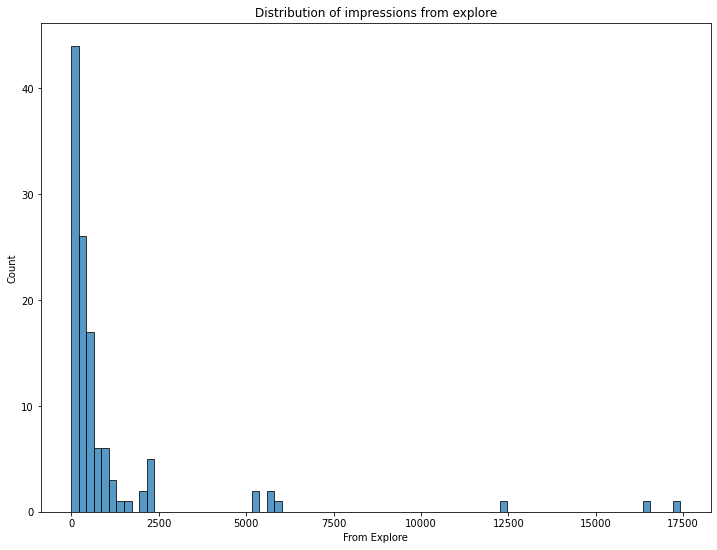

In [8]:
# Distribution from Explore
plt.figure(figsize=(12,9))
plt.title("Distribution of impressions from explore")
sns.histplot(df['From Explore'])

* The three plots show that impressions mostly come from hashtags. 
* The explore section doesn't help gain much impressions.

In [9]:
# Explore the percentage of sources of impressions
home = df['From Home'].sum()
hashtags = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
others = df['From Other'].sum()

labels = ['From Home','From Hashtags','From Explore','From Other']
values = [home, hashtags, explore, others]

fig = px.pie(df,values = values, names= labels,
            title = "Sources of Instagram posts impresssions")

fig.show()

### Analyzing content

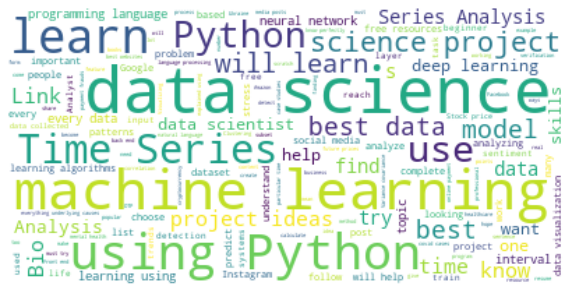

In [10]:
# We will create a wordcloud to show words appear most frequently in caption and hashtags

text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,background_color="white").generate(text)
plt.figure(figsize=(10,8))
plt.style.use("classic")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

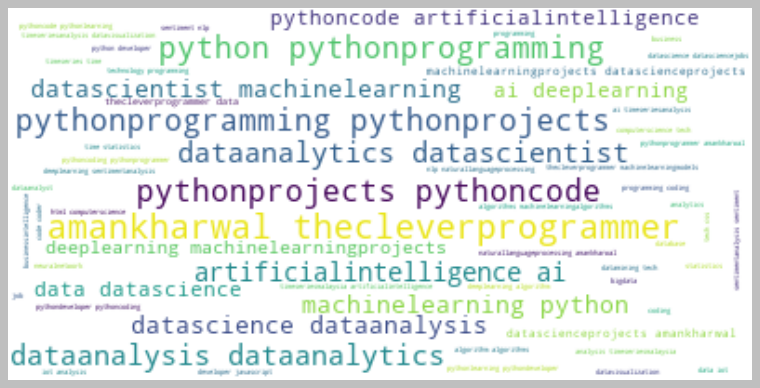

In [11]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,9))
plt.style.use("classic")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


* The bigger size the words are, the more frequent the words are mentioned/tagged in captions and hashtags.

### Analyzing relationship

In [12]:
import statsmodels
fig = px.scatter(df,x="Impressions", y="Likes", size="Likes", trendline="ols",
                 title="Correlation between Likes and Impressions")
fig.show()

* We can detect linear relationship between likes and impressions. However, there are outliers that largely impact the linear model.

In [13]:
fig_1 = px.scatter(df,x="Impressions", y="Comments", size="Comments", trendline="ols",
                   title="Correlation between Likes and Comments")
fig_1.show()

<AxesSubplot:xlabel='Impressions', ylabel='Comments'>

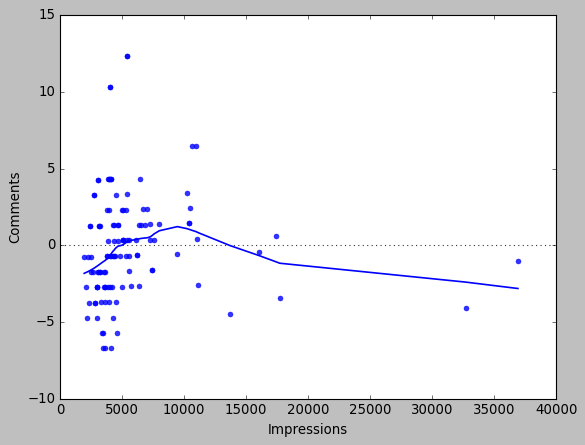

In [24]:
sns.residplot(data=df,x="Impressions",y="Comments",lowess=True)

* We cannot determine a linear relationship between impressions and comments based on the scatter plot and the residual plots

In [ ]:
fig_2 = px.scatter(df,x="Impressions",y="Shares",size="Shares",trendline = "ols",
                    title="Correlation between Impressions and Shares")
fig_2.show()

<AxesSubplot:xlabel='Impressions', ylabel='Shares'>

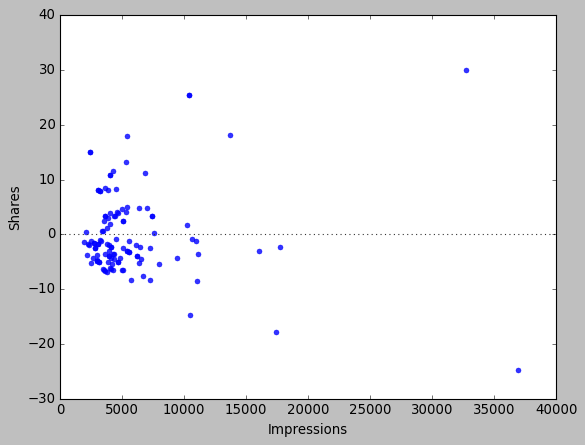

In [27]:
sns.residplot(data=df,x="Impressions",y="Shares")

* We can't detect a linear relationship between Impressions and Shares either. Most of the data points scatter around 0-10k, and there are outliers that largely impact the accuracy of the model.

In [28]:
# Subset the df to include only columns with numeric values
data = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].copy()

In [29]:
data.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  
0         9       5    162              35        2  
1         7      14    224              48       10  
2        11       1    131              62       12  
3        10       7    213              23        8  
4         5       4    123               8        0

In [30]:
correlation = data.corr()
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


* We can conclude that for this Instagram profile, impressions mainly come from explore section, the followers, likes, and home. 
* In case we want to use this Instagram pofile to promote our business, or products, we should focus on the top 4 sections where most impressions come from to make sure that our products reach large pool of people.

In [19]:
# We want to see the conversion rate on our Instgram page
conversion_rate = round(100*data['Follows'].sum()/data['Profile Visits'].sum(),2)

conversion_rate

41.0

* The conversion rate on this Instagram profile is very high, around 41%. In other words, we can say that 41% of profile visits achieve what they desire.

## INSTAGRAM REACH PREDICTION MODEL

In [31]:
# Define x, y
x=np.array(data[['Likes','Saves', 'Comments', 'Shares', 'Profile Visits','Follows']])
y=np.array(data['Impressions'])
Xtrain,xtest,Ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
# Fit and test the model
model = PassiveAggressiveRegressor()
model.fit(Xtrain,Ytrain)
model.score(xtest,ytest)

0.8785755782415448

* With the combination of different features, the model can predict the impresssions about 86% correctly.

In [22]:
# Predict impressions by all the features combined
#Features = [['Like','Saves','Comments','Shares','Profile Visits','Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9499.49289984])